### Descriptive Statistics

In [1]:
# Import libraries

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read dataset_statistics.csv

dataset_raw = pd.read_csv('dataset_statistics.csv', sep=',')

print('Dataset Size: %d rows x %d columns' % dataset_raw.shape)

print('\nDataset Preview:')
print(dataset_raw.head())

print('\nDataset Structure:')
print(dataset_raw.info())

Dataset Size: 20 rows x 9 columns

Dataset Preview:
   Customer_ID   Name  Gender   Income Product   Price  Quantity    Total  \
0            1   Arif    Male   600000       A  100000         4   400000   
1            2   Dian  Female  1200000       D  250000         4  1000000   
2            3  Dinda  Female   950000       D  250000         3   750000   
3            4  Fajar    Male   400000       A  100000         2   200000   
4            5    Ika  Female  1200000       D  250000         4  1000000   

  Satisfaction  
0    Delighted  
1    Delighted  
2    Satisfied  
3    Satisfied  
4    Delighted  

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer_ID   20 non-null     int64 
 1   Name          20 non-null     object
 2   Gender        20 non-null     object
 3   Income        20 non-null     int64 
 4   Prod

In [3]:
# Inspect missing values 

print('Number of Missing Values:')
print(dataset_raw.isnull().sum())

print('\nWe have {} missing values in total.'.format(dataset_raw.isnull().sum().sum()))

Number of Missing Values:
Customer_ID     0
Name            0
Gender          0
Income          0
Product         0
Price           0
Quantity        0
Total           0
Satisfaction    0
dtype: int64

We have 0 missing values in total.


In [4]:
# Inspect duplicate rows

if dataset_raw.duplicated().any() == True:
    print('Any duplicates? Yes')
else:
    print('Any duplicates? No')

Any duplicates? No


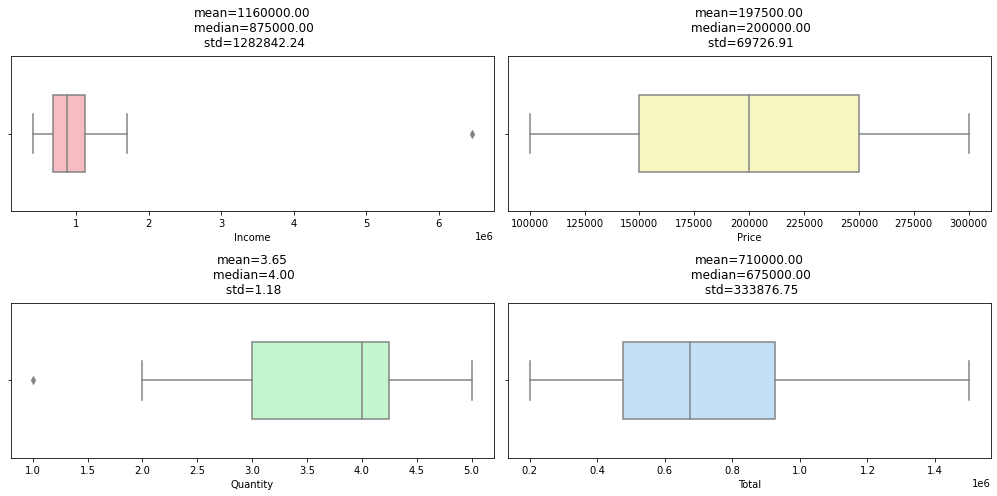

In [5]:
# Analyze numerical variables descriptive statistics

numerical = list()

for column in dataset_raw.columns:
    if (dataset_raw[column].dtypes == 'object') | (dataset_raw[column].name == 'Customer_ID'):
        continue
    numerical.append(column)

color = ['#ffb3ba', '#ffffba', '#baffc9', '#bae1ff']
n = 0

plt.figure(figsize=(14, 7))

for i, var in enumerate(numerical, 1):
    mean = dataset_raw[var].mean()
    median = dataset_raw[var].median()
    std = dataset_raw[var].std()
    
    plt.subplot(2, 2, i)
    sns.boxplot(x=dataset_raw[var], width=0.5, color=color[n])
    
    plt.title('mean=%.2f\n median=%.2f\n std=%.2f' % (mean, median, std), pad=10)
    
    n += 1
    
plt.tight_layout()
plt.show()

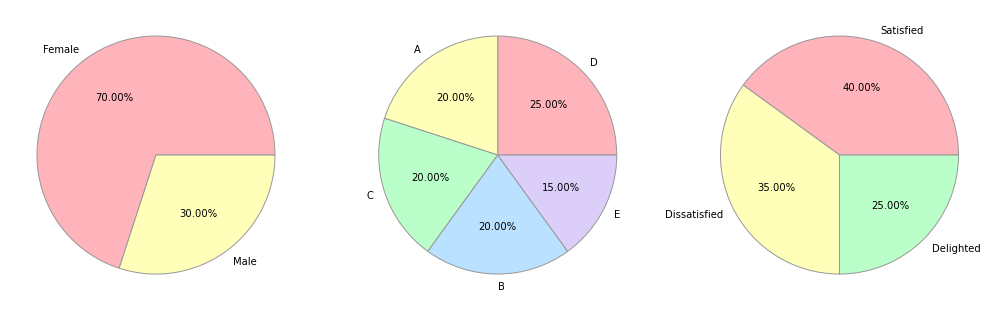

In [6]:
# Analyze categorical variables descriptive statistics

categorical = []

for column in dataset_raw.columns:
    if( dataset_raw[column].dtypes == 'int64') or (dataset_raw[column].name == 'Name'):
        continue
    categorical.append(column)
    
colors = ['#ffb3ba', '#ffffba', '#baffc9', '#bae1ff', '#dbcffa']

plt.rcParams['figure.figsize'] = (14, 7)

for i, var in enumerate(categorical, 1):
    freq = dataset_raw[var].value_counts().values
    group = dataset_raw[var].value_counts().index
    
    plt.subplot(1, 3, i)
    plt.pie(x=freq, labels=group, colors=colors, autopct='%.2f%%', wedgeprops={'edgecolor': '#999999',
                                                                               'linewidth': 1})
            
plt.tight_layout()
plt.show()

Descriptive Statistics Conclusion:
- Most of customers are female.
- The average income of customers in a month is Rp.875,000.
- The average spending of customers for a single purchase is Rp.710,000.
- Customers generally buy products for Rp.197,500 per piece.
- Customers are most likely to buy a type of product as many as four pieces.
- The type of product usually bought by customers is D.
- The average customers are satisfied with their purchases.